## <center>Introdução à Linguagem Python</center>
###  <center>Projeto de ensino - IFB</center>
---
## <center>14- Método de Verlet - Velocidade </center>
##### <center>Prof.: Bruno V. Ribeiro



# Sistemas Físicos

Vimos um método muito simples de integração de equações diferenciais ordinárias que funciona para uma variedade bem grande de sistemas.

Vamos focar, agora, em um sistema com significado Físico.

Em uma dimensão, vamos supor que queremos descrever o movimento de um objeto sujeito a alguma força (aceleração). As variáveis que nos interessam são:

* $x(t)$ - posição no tempo $t$
* $v(t)$ - velocidade no tempo $t$
* $a(t)$ - aceleração no tempo $t$.

Podemos discretizar o tempo e apenas acompanhar essas variáveis em instantes dados por:

$t = 0, h, 2h, 3h,..., nh,...$, onde $h << 1$.

Sendo assim, podemos escrever, para as 3 variáveis que nos interessam:

$x(t_n) = x(t = nh) = x_n$.

Assim, temos uma sequência discreta de valores para $x$, $v$ e $a$.

O que gostariamos é de obter um método iterativo que nos permita calcular, dado um conjunto de valores iniciais $x_0$ e $v_0$, todos os valores de $x_n$ e $v_n$.

# Método iterativo (expansões de Taylor)

Podemos assumir que todas as variáveis são bem comportadas o suficiente para que possamos usar séries de Taylor para aproximá-las. Ainda, vamos assumir que as forças que iremos trabalhar (aceleração) dependem, apenas, das posições (ou seja, nada de forças de resistência ou arraste).

Assim, podemos usar uma expansão em Taylor para obter os valores de $x_{n+1}$ e $x_{n-1}$ na forma

$$ x_{n+1} = x_n + h . \dot{x}_n  + \frac{1}{2}h^2 \ddot{x}_n + O(h^3) \quad\quad (1)$$
$$ $$
$$ x_{n-1} = x_n + h . \dot{x}_n  - \frac{1}{2}h^2 \ddot{x}_n - O(h^3) \quad\quad (2)$$

Lembrando que, por definição $\dot{x}_n = v_n$ e $\ddot{x}_n = a_n$.

Somando (1) e (2) e negligenciando termos de $O(h^4)$, temos

$$ x_{n+1} = 2 x_n - x_{n-1} + a_n . h^2 \quad\quad (3)$$.

E, subtraindo (1) e (2):

$$ v_n = \frac{x_{n+1} - x_{n-1}}{2.h} \quad\quad (4)$$

Reescrevendo (4) na forma $x_{n-1} = x_{n+1} - 2. v_n . h$ e substituindo em (3):

$$ \color{red}{x_{n+1} = x_n + v_n . h + \frac{a_n}{2} h^2} \quad\quad (5) $$.


Agora, lembrando que as eqs. (4) e (3) valem para todo $n$:

$$ v_{n+1} = \frac{x_{n+2} - x_{n}}{2.h} \quad\quad (6)$$
$$ $$
$$ x_{n+2} = 2 x_{n+1} - x_{n} + a_{n+1} . h^2 \quad\quad (7)$$.

Substituindo (7) em (6)

$$ v_{n+1} = \frac{ x_{n+1} - x_n }{h} + \frac{a_{n+1} . h}{2} \quad\quad (8)$$

Finalmente, usando a eq. (5), temos

$$ \color{red}{v_{n+1} = v_n + \frac{1}{2}(a_{n+1} + a_n)} \quad \quad (9)$$


# Forma do algoritmo

O sistema que encontramos, formado pelas eqs. (5) e (9) é o

$$\left\{
\begin{array}{lcl}
x_{n+1} = x_n + v_n . h + \frac{a_n}{2} h^2
\\
\\
v_{n+1} = v_n + \frac{1}{2}(a_{n+1} + a_n)
\end{array}
\right.$$

Este serve para calcular a evolução temporal das posições e das velocidades (com erro da ordem de $h^3$). NOTEM que a segunda equação deste sistema depende de $a_{n+1}$, então não podemos criar um algoritmo diretamente deste. 

Mas, existe um jeito esperto de reescrever o sistema de maneir a deixá-lo facilmente executável em um código numérico: **(FICA PARA VOCÊS CONFERIREM A REESCRITA DO SISTEMA PORQUE A VIDA É DURA...)**

$$\left\{
\begin{array}{lcl}
v_{n + 1/2} = v_n + \frac{a_n}{2}. h
\\
\\
x_{n+1} = x_n + v_{n + 1/2} . h
\\
\\
v_{n+1} = v_{n + 1/2} + \frac{a_{n+1}}{2} . h
\end{array}
\right.$$

Este é o conhecido **algoritmo de Verlet** (em sua forma "de velocidade") e é um dos mais utilizados em dinâmica molecular por sua simplicidade e erro razoável.

**NOTEM**: 
* Para resolver o sistema, precisamos fornecer as condições iniciais $x_0$ e $v_0$, além da equação para calcular as acelerações;

* o termo $a_{n+1}$ ainda aparece no lado direito na última equação deste sistema. Mas, como assumimos lá no início que a força dependeria apenas das posições **(ou seja, $a_{n+1}$ depende apenas de $x_{n+1}$)**, ao calcularmos a segunda equação do sistema, temos condições de calcular $a_{n+1}$ no terceiro termo (MUUUUUITO MASSA ISSO!).

## Pêndulo simples

**Vamos resolver o mesmo problema do pêndulo para testar nosso novo algoritmo.**

**Se você acompanhou as últimas atividades, os próximos parágrafos serão repetição, mas coloco aqui para ser um documento auto-contido!**

<img style="float: right;" src="https://thefactfactor.com/wp-content/uploads/2020/03/Simple-Pendulum-02.png">

Sem entrar em muitos detalhes (porque não é o foco aqui), ao lado temos um pêndulo simples. Ele é descrito pelo comprimento da corda ($L$) a massa do objeto ($m$) e suas condições iniciais. O que podemos dar como condição inicial é um valor para o ângulo inicial ($\theta_0$) e para sua velocidade inicial ($v_0$).

A força resultante na massa do pêndulo é dada por

$$ F_R = -mg\rm{sen} \theta$$

Reescrevendo, utilizando a 2ª Lei de Newton ($F_R = m. a$)

$$ a = -g\rm{sen} \theta \rightarrow \dot{v} = -g\rm{sen}\theta \rightarrow \ddot{x} = -g\rm{sen}\theta$$

Aqui usamos a notação com ponto ($\dot{y}$) como derivada temporal. Isso é uma equação de segunda ordem (que ainda não sabemos resolver numericamente). Mas, equações de segunda ordem podem ser transformadas em sistemas de equações de primeira ordem (isso é um resultado geral, que não demonstraremos aqui...).

Como fazer? Bom, se vocês se lembrarem de movimento de rotação, nos definimos a velocidade angular ($\omega$) como a variação temporal do ângulo de rotação ($\theta$, no caso). Ou seja, $\dot{\theta} = \omega$. Também definimos a aceleração angular como a variação da velocidade angular ($\dot{\omega}$). E, temos a relação entre velocidade e velocidade angular dada por $v = \omega . L$.

Juntando essa bomba de informação, podemos escrever a aceleração da seguinte maneira:

$$ a =  \dot{v} = -g\rm{sen}\theta$$
$$ a =  \dot{\omega}.L = -g\rm{sen}\theta$$.

Com isso, podemos escever a equação de segunda ordem em $x$ como duas equações acopladas (sistema) para as coordenadas $(\theta, \omega)$:


$$\left\{
\begin{array}{lcl}
\dot{\theta} = \omega
\\
\\
\dot{\omega} = (\dot{ v}/L) = - \frac{g}{L} \mathrm{sen}\theta
\end{array}
\right.$$


**AQUI JÁ É NOVIDADE DESTE ARQUIVO!**
O que precisamos para usar o algoritmo de Verlet é saber a forma da aceleração. Em nosso caso, a aceleração é a variação de $\omega$ com o tempo, ou seja, a segunda equação deste último sistema.


# Aplicando o algoritmo de Verlet

Nosso sistema é dado por

$$\left\{
\begin{array}{lcl}
v_{n + 1/2} = v_n + \frac{a_n}{2}. h
\\
\\
x_{n+1} = x_n + v_{n + 1/2} . h
\\
\\
v_{n+1} = v_{n + 1/2} + \frac{a_{n+1}}{2} . h
\end{array}
\right.$$

Para implementar um código iterativo deste algoritmo, precisamos fornecer os valores iniciais $x_0$ e $v_0$, além de conseguir escrever uma função que calcule a aceleração na forma $a_n = a_n(x_n)$.

Para o caso específico do pêndulo, identificamos as variáveis como:

> $x_n = \theta(t_n), \quad v_n = \omega(t_n), \quad a_n = \dot{\omega}(t_n)$


## Exemplo de implementação - Pêndulo

Vamos implementar nosso método ao Pêndulo simples descrito acima. Começamos importanto os módulos relevantes.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Para definir o passo do algoritmo de Verlet **(AV)**, vamos escrever uma função que aceite como argumento: posições, tempo, aceleração e o passo de tempo `h`.

In [7]:
def AV(x, v, h):
    v = v + a(x)*(h/2)
    x = x + v*h
    v = v + a(x)*(h/2)
    return x, v

# NOTEM que a é uma função que ainda vamos escrever!

Agora precisamos escrever uma função para calcular a aceleração.

In [8]:
# Definir constantes globais
g = 10.0
L = 1

def a(x):    
    return -(g/L)*np.sin(x)   # omega(ponto) = -(g/L).sen(theta)

Agora vamos criar nossa evolução no tempo:

In [9]:
# Definindo constantes:
h = 0.01                                # Passo no tempo

x0 = np.pi/6
v0 = 0.01                               # Condição inicial (theta_0, omega_0)

t0 = 0.0
t_max = 10

# A variável t será usada para acompanhar o "tempo atual"
t = t0

# Valores de x e v no "tempo atual"
x = x0
v = v0

# Criaremos um array para armazenar todos os valores de theta e outro para omega ao longo do tempo
theta_t = np.array([x0])
omega_t = np.array([v0])

# Vamos criar um array para armazenar os valores do tempo também
t_t = np.array([t0])      # O primeiro elemento desta lista será o t0


while t <= t_max:
    # Incrementando o valor de y usando a expressão (1)
    x , v = AV(x, v, h)
    
    # Incrementando o tempo
    t += h

    # Armazenando o valor de theta e omega no array
    theta_t = np.append(theta_t, x)
    omega_t = np.append(omega_t, v)

    # Armazenando o valor de t no array
    t_t = np.append(t_t, t)


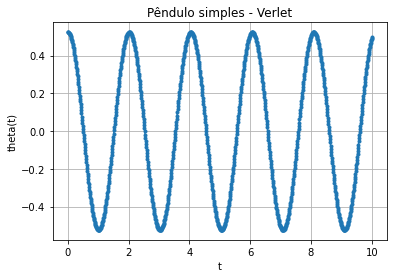

In [10]:
plt.plot(t_t, theta_t, '.-')
plt.title("Pêndulo simples - Verlet")
plt.xlabel("t")
plt.ylabel("theta(t)")
plt.grid()
plt.show()

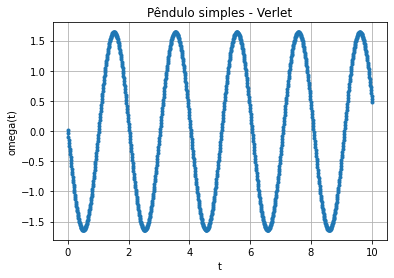

In [11]:
plt.plot(t_t, omega_t, '.-')
plt.title("Pêndulo simples - Verlet")
plt.xlabel("t")
plt.ylabel("omega(t)")
plt.grid()
plt.show()

Como esperado, tanto $\theta$ quanto $\omega$ oscilam no tempo (vocês conseguem resolver o sistema "na mão" e ver qual é a solução para comparação). Vejam o que acontece se plotarmos $\omega$ por $\theta$, no que chamamos de "retrato de fases".

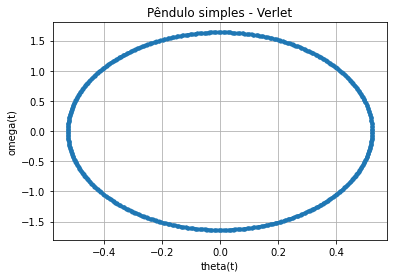

In [13]:
plt.plot(theta_t, omega_t, '.-')
plt.title("Pêndulo simples - Verlet")
plt.xlabel("theta(t)")
plt.ylabel("omega(t)")
plt.grid()
plt.show()

Quando resolvemos este mesmo problema usando o **MEE**, notamos que uma escolha do passo de tempo igual a `0.1` gera erros estranhos de flutuação numérica em nosso resultado. Vamos ver como o AV se comporta com o mesmo passo de tempo:

In [16]:
# Definindo constantes:
#############################
######### MUDEI O h #########
#############################
h = 0.1                                # Passo no tempo

x0 = np.pi/6
v0 = 0.01                               # Condição inicial (theta_0, omega_0)

t0 = 0.0
t_max = 10

# A variável t será usada para acompanhar o "tempo atual"
t = t0

# Valores de x e v no "tempo atual"
x = x0
v = v0

# Criaremos um array para armazenar todos os valores de theta e outro para omega ao longo do tempo
theta_t = np.array([x0])
omega_t = np.array([v0])

# Vamos criar um array para armazenar os valores do tempo também
t_t = np.array([t0])      # O primeiro elemento desta lista será o t0


while t <= t_max:
    # Incrementando o valor de y usando a expressão (1)
    x , v = AV(x, v, h)
    
    # Incrementando o tempo
    t += h

    # Armazenando o valor de theta e omega no array
    theta_t = np.append(theta_t, x)
    omega_t = np.append(omega_t, v)

    # Armazenando o valor de t no array
    t_t = np.append(t_t, t)


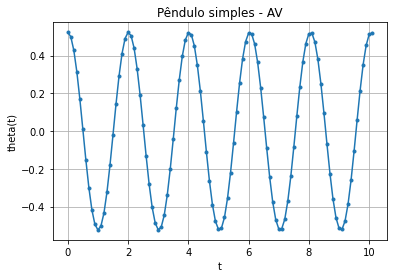

In [17]:
plt.plot(t_t, theta_t, '.-')
plt.title("Pêndulo simples - AV")
plt.xlabel("t")
plt.ylabel("theta(t)")
plt.grid()
plt.show()

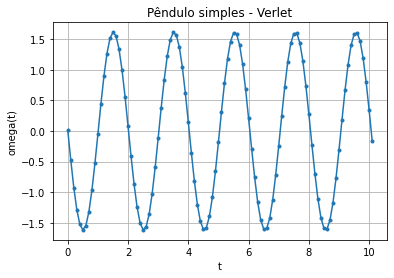

In [18]:
plt.plot(t_t, omega_t, '.-')
plt.title("Pêndulo simples - Verlet")
plt.xlabel("t")
plt.ylabel("omega(t)")
plt.grid()
plt.show()

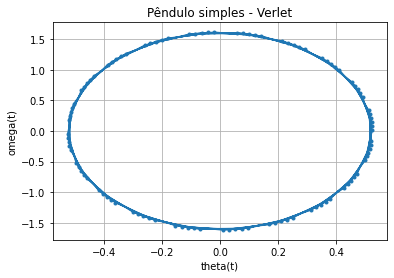

In [19]:
plt.plot(theta_t, omega_t, '.-')
plt.title("Pêndulo simples - Verlet")
plt.xlabel("theta(t)")
plt.ylabel("omega(t)")
plt.grid()
plt.show()

Que coisa linda! Com um método um pouco mais sofisticado, conseguimos bons resultados com um passo de tempo relativamente grande, o que reduz esforço computacional!

## Importante:

Notem que no algoritmo que escrevemos aqui, eu escolhi usar a aceleração explicitamente como geradora de variação na velocidade. Vocês também vão encontrar na literatura o mesmo algoritmo usando a força em vez da aceleração apenas fazendo a alteração $a_n \rightarrow \frac{F(x_n)}{m}$, a partir da segunda Lei de Newton.